In [1]:
import numpy as np
import pandas as pd
from collections import Counter

import warnings
warnings.simplefilter('ignore')

In [2]:
cols = ['a', 'b', 'c', 'label']

df = pd.DataFrame(np.random.randint(0, 2, size=(20, len(cols))), columns=cols)
df.head()

,a,b,c,label
0,1,1,0,1
1,0,1,0,0
2,0,1,1,1
3,0,1,1,0
4,0,0,1,1


In [3]:
# compute gini for two features
gini_list = []
for col in df.columns:
    gini = 0
    for f in df[col].unique():
        tmp_df = df.loc[df[col] == f, 'label']
        times = Counter(tmp_df)
        total  = sum(times.values())
        # gini = 1 - sum(prob**2)
        gini_part = np.sum([(v / total)**2 for v in times.values()])
        # add with weight
        gini_part *= len(tmp_df) / (len(df))
        gini += gini_part
    print("Gini for {} is {}".format(col, (1 - gini)))
    gini_list.append(gini)
    

Gini for a is 0.4547619047619048
Gini for b is 0.4833333333333334
Gini for c is 0.41978021978021984
Gini for label is 0.0


In [4]:
def compute_gini(df, col_fomula):
    tmp_df = df.loc[col_fomula, 'label']
    times = Counter(df)
    total = sum(times.values())
    gini = len(tmp_df) / len(df) * (1 - np.sum([ (v / total)**2 for v in times.values()]))
    return gini
    

In [5]:
# check with numeric data
num_df = pd.DataFrame(np.random.randn(20, 1), columns=['con'])

num_df = pd.concat([num_df, df['label']], axis=1)

# sort by `con`
num_df = num_df.sort_values(by='con', ascending=True)
num_values = num_df['con'].values

mean_list = [np.mean([num_values[i], num_values[i+1]]) for i in range(len(num_values) - 1)]

gini_list = []
for mean in mean_list:
    gini = compute_gini(num_df, num_df['con'] <= mean)
    gini_list.append(gini)
    

print("Best gini spit: ", mean_list[np.argmin(gini_list)])


Best gini spit:  -1.1010001315200912


In [6]:
def compute_dtc_gini(df):
    gini_list = []
    feature_cols = list(df.columns)
    
    feature_cols.remove('label')
    
    for col in feature_cols:
        gini = 0
        for f in df[col].unique():
            tmp_df = df.loc[df[col] == f, 'label']
            times = Counter(tmp_df)
            total  = sum(times.values())
            # gini = 1 - sum(prob**2)
            gini_part = 1 - np.sum([(v / total)**2 for v in times.values()])
            # add with weight
            gini_part *= len(tmp_df) / (len(df))
            gini += gini_part
        print("Gini for {} is {}".format(col, (1 - gini)))
        gini_list.append(1 - gini)

    
    # get best split feature
    best_split_feature = feature_cols[np.argmin(gini_list)]
    
    print("Best split feature:", best_split_feature)
    
    # split data into new parts
    for value in df[best_split_feature].unique():
        new_df = df.loc[df[best_split_feature] == value]
        if new_df.shape[1] == 1 or  len(new_df) == 0:
            break
        if len(new_df) <= 5:
            return 
        print("*" * 10 + str(len(new_df)))
        compute_dtc_gini(new_df)
    
# compute_dtc_gini(df)
    

In [7]:
# For regression tree logic
df = pd.DataFrame(np.random.randn(10, 3), columns=['a', 'b', 'label'])

df.head()

,a,b,label
0,-0.181685,-0.068319,0.457954
1,-1.165655,0.274452,-0.187644
2,0.955899,0.065044,0.754446
3,0.754582,1.018429,1.041094
4,2.364820,0.677823,-0.239650


In [8]:
# test for `a`
import copy

df_a = copy.deepcopy(df[['a', 'label']])

# sort value
df_a = df_a.sort_values(by='a')

value_a = df_a['a'].values

# get mean value list
mean_value = [np.mean([value_a[i], value_a[i+1]]) for i in range(len(value_a) - 1) ]

# get each threashold residual

residual_list = []
for mean in mean_value:
    tmp_left = df_a.loc[df_a['a'] < mean, 'label']
    tmp_right = df_a.loc[df_a['a'] >= mean,'label']
    
    left_pred = tmp_df.mean()
    right_pred = tmp_df.mean()
    
    left_residual = (tmp_left.values - left_pred).mean()
    right_residual = (tmp_right.values - right_pred).mean()
    
    residual = left_residual + right_residual
    residual_list.append(residual)
    

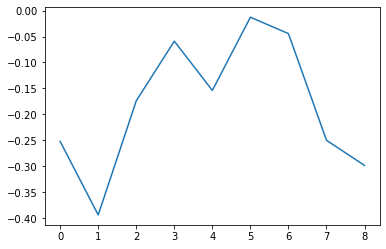

split index:  -0.38375098626351967


In [10]:
import matplotlib.pyplot as plt

plt.plot(range(len(residual_list)), residual_list)
plt.show()

print("split index: ", value_a[np.argmin(residual_list)])

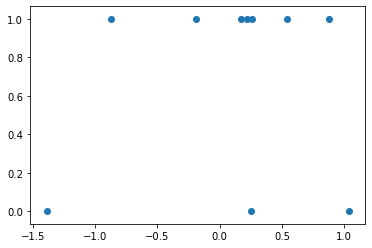

In [11]:
# Let's check with nueral network
def relu(x):
    return np.max(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_data = np.random.randn(10, 1)
y_data = np.random.randint(0, 2, size=(10, 1))

plt.scatter(x_data, y_data)

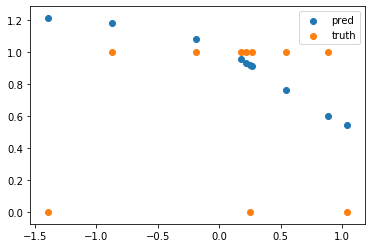

In [12]:
# with 2 nuerouns
w11 = 1.4
b11 = -1

w12 = -2.9
b12 = 2

w21 = -2
b21 = 1

w22 = 3
b22 = -3

# nueral 1
def mul(data, w, b):
    return sigmoid(data * w + b)

res_1 = mul(x_data, w11, b11)
res_2 = mul(x_data, w12, b12)

res_out = mul(res_1, w21, b21) + mul(res_2, w22, b22)

plt.scatter(x_data, res_out, label='pred')
plt.scatter(x_data, y_data, label='truth')

plt.legend()
plt.show()

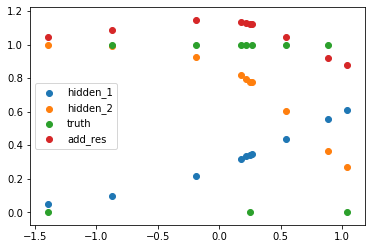

In [13]:
plt.scatter(x_data, res_1, label='hidden_1')
plt.scatter(x_data, res_2, label='hidden_2')
plt.scatter(x_data, y_data, label='truth')

plt.scatter(x_data, res_1 + res_2, label='add_res')

plt.legend()
plt.show()

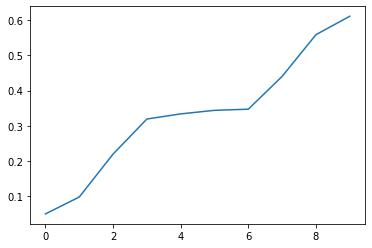

In [14]:
plt.plot(sorted(res_1))

In [15]:
res_1

array([[0.09782984],
       [0.33370319],
       [0.61078501],
       [0.31913997],
       [0.3438402 ],
       [0.4401504 ],
       [0.04992575],
       [0.21967329],
       [0.34708034],
       [0.55851546]])